# Homework 1

- **Authors**: Michal Spano, ...
- **Group no.**: `28`
- **Description**: Source code for `HW1` of Summer Course `NUMA0` @ **Lund University, Sweden**.

In [48]:
# Imports 
from numpy import sqrt, log
import matplotlib.pyplot as plt

## Task 1 - Approximating the logarithm

In this task, we construct a function that **approximates a logarithm** by $n$ steps based on the following algorithm:

- Having $x > 0$, let $a_0 = \frac{1 + x}{2}, g_0 = \sqrt x$,
- iterate $a_{i + 1} = \frac{a_i + g_i}{2}$ and $g_{i + 1} = \sqrt{a_{i + 1}} g_i$,
- then $\frac{x - 1}{a_i}$ is the approximation of $\ln(x)$.

In [49]:
def approx_ln(x: float, n: int) -> float:
    # Base check
    if x <= 0:
        raise ValueError("The input value must be greater than 0.")
    
    # Initialize the mean values
    a, g = (1 + x) / 2, sqrt(x)
    
    # Iterate in n steps
    for _ in range(n):
        a = (a + g) / 2
        g = sqrt(a * g)
    
    # Return the computed approximation
    return (x - 1) / a

## Task 2 - Plotting functions and their difference

In this task, a single function `plot_func` is used. Calling it with no argument results in plotting the functions in a single Cartesian coordinate system. Setting `diff_mode = True` will result in displaying a plot with the **difference** of both functions.

*Note*: an established implementation (from the `numpy` library) [`log`](https://numpy.org/doc/stable/reference/generated/numpy.log.html) is used.

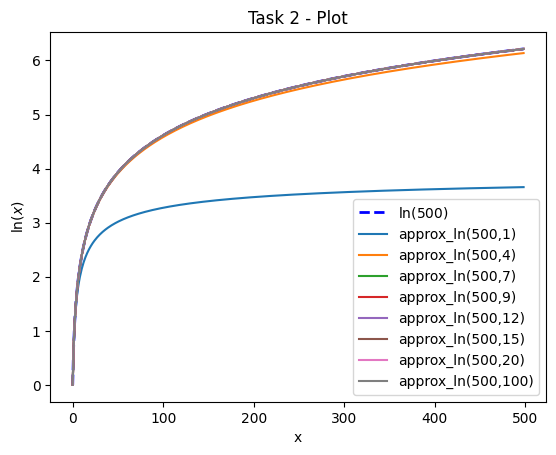

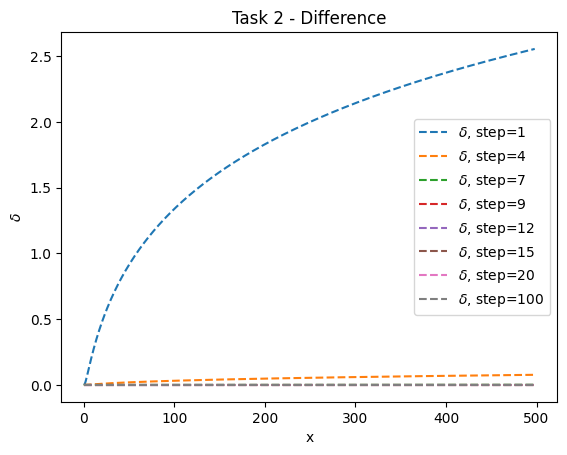

In [50]:
def plot_func(diff_mode: bool = False) -> None:
    # We consider some n values
    ns = [1, 4, 7, 9, 12, 15, 20, 100]
    
    # Some fixed range of x values: 1..500
    x_range = 500
    
    # Compute and show expected ln(x)
    ln_ys = [log(x) for x in range(1, x_range)]
    if not diff_mode:
        plt.plot(ln_ys, linewidth=2, label=f"$\\ln({x_range})$",
                 linestyle="dashed", color="blue")
    
    # Compute with approx_ln for different n values
    for n in ns:
        # approx_ln_ys = [approx_ln(x, n) for x in range(1, x_range)]
        approx_ln_ys = [approx_ln(x, n) for x in range(1, x_range)]
        delta_y      = [abs(a - b) for a, b in zip(approx_ln_ys, ln_ys)]
        
        # Display the gathered data
        if not diff_mode:
            plt.plot(approx_ln_ys, linewidth=1.5,
                     label=f"approx_ln({x_range},{n})")
        else:
            plt.plot(delta_y, linewidth=1.5, linestyle="dashed",
                     label=f"$\\delta$, step={n}")
    plt.xlabel("x")
    
    # Difference modes support
    if not diff_mode:
        plt.ylabel("$\\ln(x)$")
        plt.title("Task 2 - Plot")
    else:
        plt.ylabel("$\\delta$")
        plt.title("Task 2 - Difference")

    plt.legend(loc='best')
    plt.show()
    

plot_func()
plot_func(True)

# Task 3 - Error given $x$

In this example, we let $x = 1.41$. We then proceed to plot the absolute value of the error $\delta$ against $n$. We let $n$ be $1, 10, \dots, 100$. This graph is represented with a **dotted line** where the $x$ values represent the individual steps ($n$) and $y$ represent the absolute value of the error.

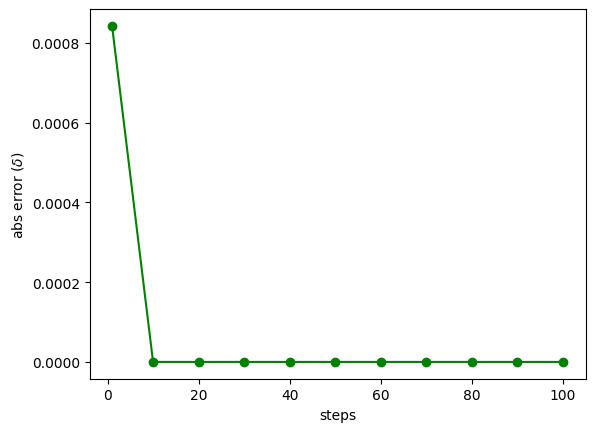

In [51]:
x = 1.41
ns = [1] + [i for i in range(10, 110, 10)] # 1, 10, 20, ..., 100 (n step values)

approx_ln_ys = [approx_ln(x, n) for n in ns]
delta_y      = [abs(y - log(x)) for y in approx_ln_ys]

plt.plot(ns, delta_y, "go-") # use a dotted line
plt.xlabel("steps")
plt.ylabel("abs error ($\\delta$)")
plt.show()

# Task 4 - Improving the algorithm

Based on the provided article, the following method is suggested to accelerate the convergence of the previous implementation.

- We iterate $i = 0$ through $n$,
- let $d_{0,i} = a_i$, and
- $d_{k,i} = \frac{d_{k-1, i} -4^{-k} d_{k-1,i-1}}{1-4^{-k}}$ such that $k = 1, \dots, i$ whenever $i > 0$.

Lastly, an approximation of $\ln(x)$ is taken as $\frac{x-1}{d_{n,n}}$.

In [52]:
# TODO: finish this implementation
def fast_approx_ln(x: float, n: int) -> float:
    if x <= 0:
        raise ValueError("The input value must be greater than 0.")

    """
    FIXME: missing implementation
    """
    
    return 0

# Task 5 - Plotting the improved method

    Task 5: replicate the plot provided in the homework using the
    `fast_approx_ln` method.

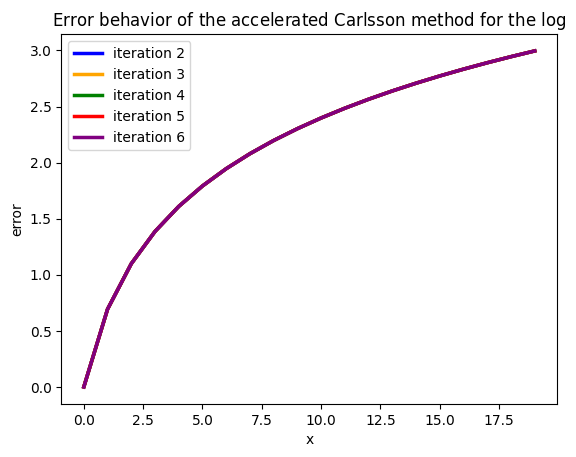

In [53]:
def accelerated_log_plot() -> None:
    x_range = 20 # from the plot
    xs = range(1, x_range + 1) # from the plot
    colors = ["blue", "orange", "green", "red", "purple"] # exact colors from the plot
    
    for i in range(2, 7): # iterations 2..6
        fast_approx_ln_ys = [fast_approx_ln(x, i) for x in xs] # TODO: finish task 4
        delta_y = [abs(y - log(x)) for x, y in zip(xs, fast_approx_ln_ys)]
        plt.plot(delta_y, linewidth=2.5, color=colors[i-2],
                 label=f"iteration {i}")
    
    plt.title("Error behavior of the accelerated Carlsson method for the $\\log$")
    plt.xlabel("x")
    plt.ylabel("error")
    plt.legend(loc="upper left")
    plt.show()
    
accelerated_log_plot()